<a href="https://colab.research.google.com/github/younus8imran/TSF-GRIP-Internship/blob/master/Task_4_To_Explore_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Tree Algorithm

### In this task we'll create the Decision Tree Classifier on 'iris' dataset and visualize it graphically.The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly

[The dataset can be found here](https://raw.githubusercontent.com/younus8imran/TSF-GRIP-Internship/master/iris.csv)

##Importing all the necessary libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

##Loading the iris dataset

In [10]:
url = 'https://raw.githubusercontent.com/younus8imran/TSF-GRIP-Internship/master/iris.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df_iris = pd.read_csv(url, names=names).astype({
                                'sepal-length': 'float32',
                                'sepal-width': 'float32',
                                'petal-length': 'float32',
                                'petal-width': 'float32',
                                'class': 'object'
})

In [35]:
feature_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']

##Memory usage by the dataframe

In [14]:
df_iris.memory_usage(deep=True).sum()

13078

##Dimension of dataset

In [11]:
print(df_iris.shape)

(150, 5)


##A look at the dataset

In [12]:
df_iris.sample(10)

,sepal-length,sepal-width,petal-length,petal-width,class
98,5.1,2.5,3.0,1.1,Iris-versicolor
37,4.9,3.1,1.5,0.1,Iris-setosa
119,6.0,2.2,5.0,1.5,Iris-virginica
93,5.0,2.3,3.3,1.0,Iris-versicolor
86,6.7,3.1,4.7,1.5,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
83,6.0,2.7,5.1,1.6,Iris-versicolor
49,5.0,3.3,1.4,0.2,Iris-setosa
138,6.0,3.0,4.8,1.8,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


##Statistical description of the dataset

In [15]:
df_iris.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843335,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##Distribution of class

our dataset has three classes i.e. setosa, versicolor and virginica.
let's  check the number of instances that belong to each class

In [16]:
df_iris.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

we can see from above that each class has equal number of instances

## Data Visualization

#### Univariate Plot

let's create histogram plots of each input variable to get check the distribution of our dataset

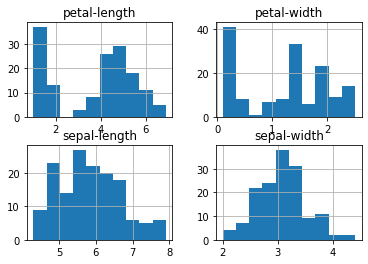

In [21]:
df_iris.hist()
plt.show()

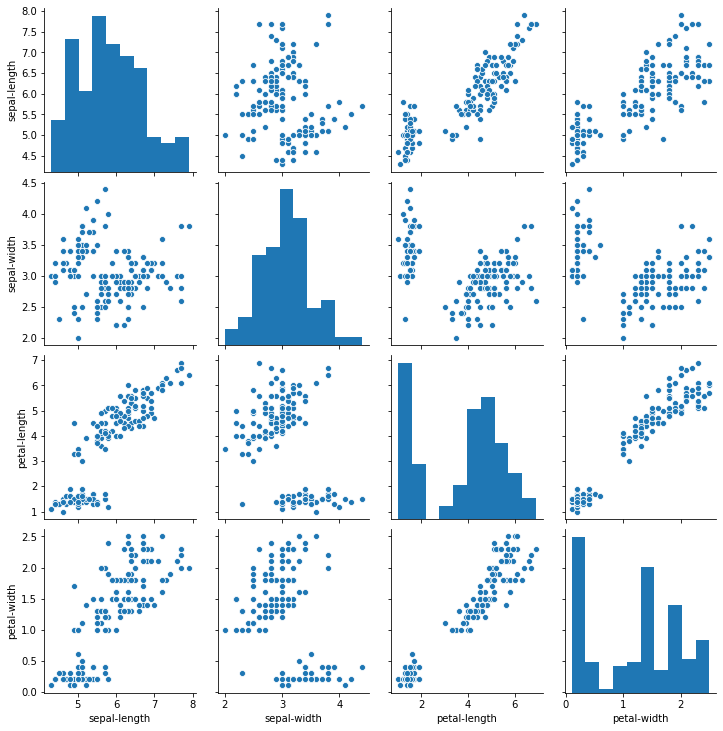

In [24]:
sns.pairplot(df_iris);

## Splitting Dataset into input and Output features

In [30]:
X = df_iris.values[:, 0:4]
y  = df_iris.values[:, 4]

##Splitting features into train and test sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,
                                                    random_state=1)

##Defining the model

In [33]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Decision tree graph

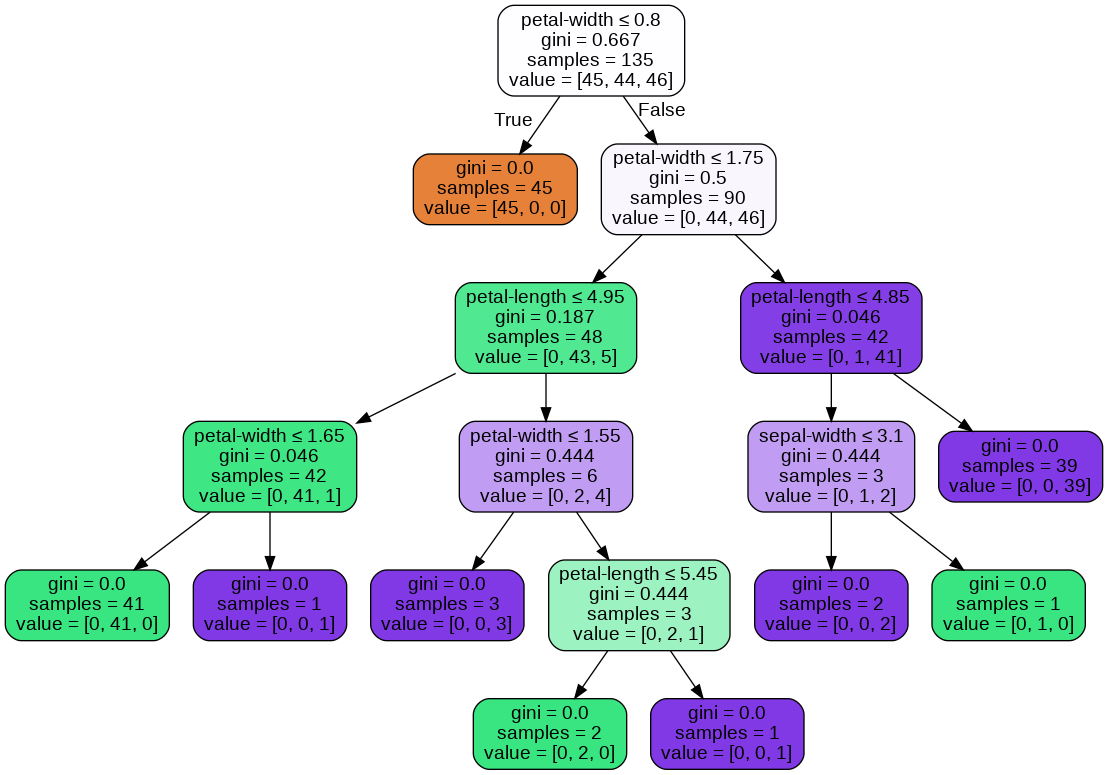

In [38]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())